# Demo of ADVERSARIAL EXAMPLES Attack

In [1]:
import foolbox
from foolbox.models import KerasModel
from foolbox.attacks import LBFGSAttack
from foolbox.criteria import TargetClassProbability
import numpy as np
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions

Using TensorFlow backend.


## Initial the model and get original image

In [2]:
keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

image, label = foolbox.utils.imagenet_example()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## run the attack and store the processed image to an object

In [3]:
attack = LBFGSAttack(model=fmodel, criterion=TargetClassProbability(781, p=.5))
adversarial = attack(image[:, :, ::-1], label)

## show the feature point of the adversarial image

In [4]:
print(np.argmax(fmodel.predictions(adversarial)))

781


## show the confidence of the result

In [5]:
print(foolbox.utils.softmax(fmodel.predictions(adversarial))[781])

0.83863455


## store the adversarial image to an object

In [6]:
adversarial_rgb = adversarial[np.newaxis, :, :, ::-1]

In [7]:
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))

## print the final result of the prediction

In [8]:
print("Top 5 predictions (adversarial: ", decode_predictions(preds, top=5))

Top 5 predictions (adversarial:  [[('n04149813', 'scoreboard', 0.8307865), ('n04152593', 'screen', 0.018469794), ('n03196217', 'digital_clock', 0.017802648), ('n03782006', 'monitor', 0.01704048), ('n04141975', 'scale', 0.008119601)]]


## built a plot system to show the result

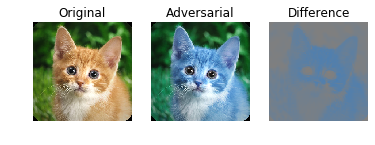

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image / 255)  # division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(image[:, :, ::-1] / 255)  # ::-1 to convert BGR to RGB
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = image[:, :, ::-1] - image
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()